# Práctica 2 - Aprendizaje Automático (Ejercicio 2)

## Enunciado

En el segon exercici (dificultat B), farem la comparació del rendiment dels tres models anteriors
amb el data set complert del repositori UCI Machine learning[7]. Primer proveu si canvien els
resultats de l’exercici 1 quan s’aplica a noves dades no emprades a aprenentatge ni a test.
Després, intentar millorar els resultats re-aprenent els models amb nous conjunts
d’aprenentatge, test i validació, emprant el mètode de k-fold crossvalidation[8] per triar el
millor model.

In [1]:
#pip install ucimlrepo


In [2]:
from ucimlrepo import fetch_ucirepo 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics, datasets,svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
# fetch dataset 
optical_recognition_of_handwritten_digits = fetch_ucirepo(id=80) 
# data (as pandas dataframes) NO SE UTILIZAN PARA TEST, NI TRAINGING, SOLO PARA PREDICCIÓN
X = optical_recognition_of_handwritten_digits.data.features 
y = optical_recognition_of_handwritten_digits.data.targets 
#dataset Ej 1, UTILIZADO PARA ENTRENAMIENTO Y APRENDIZAJE
digits = datasets.load_digits()
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [3]:
#Entrenamiento con Dataset del Ej 2
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42,shuffle=False)
#Entrenamiento con Dataset del Ej 1
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.5, random_state=42,shuffle=False)


## Perceptrón

C:\Users\hugot\miniconda3\envs\ia2023\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but Perceptron was fitted without feature names
  warnings.warn(


Classification report for classifier Perceptron(random_state=42, tol=1e-09):
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       554
           1       0.80      0.96      0.87       571
           2       0.98      0.95      0.96       557
           3       0.93      0.89      0.91       572
           4       0.98      0.85      0.91       568
           5       0.82      0.96      0.88       558
           6       0.94      0.98      0.96       558
           7       0.96      0.95      0.95       566
           8       0.92      0.77      0.83       554
           9       0.88      0.82      0.85       562

    accuracy                           0.91      5620
   macro avg       0.92      0.91      0.91      5620
weighted avg       0.92      0.91      0.91      5620


Confusion matrix:
[[544   0   0   0   2   2   5   0   1   0]
 [  1 549   0   7   0   4   1   2   3   4]
 [ 10   2 529   3   0   5   0   0   6   2]
 [  1   7   1 50

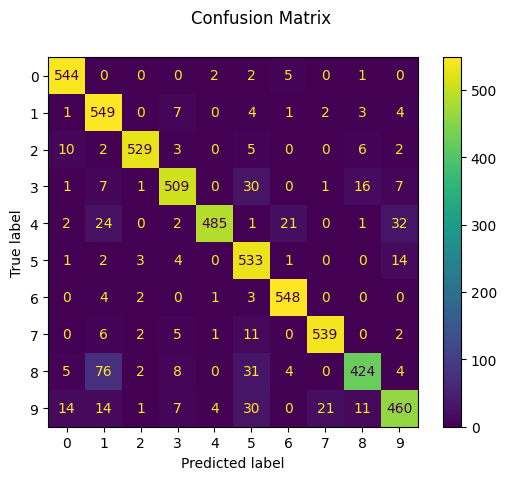

In [4]:
#Se crear el clasificadro con el modelo lineal del perceptron y seguidamente se entrena
clf = Perceptron(random_state=42)
clf.fit(X_train, y_train)
# Se hace la predicción de los datos para testear
y_pred = clf.predict(X)
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y, y_pred)}\n"
)
disp = metrics.ConfusionMatrixDisplay.from_predictions(y, y_pred)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

C:\Users\hugot\miniconda3\envs\ia2023\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Classification report for classifier LogisticRegression(max_iter=10000):
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       554
           1       0.96      0.93      0.95       571
           2       0.96      0.96      0.96       557
           3       0.95      0.92      0.93       572
           4       0.98      0.91      0.94       568
           5       0.94      0.94      0.94       558
           6       0.95      0.99      0.97       558
           7       0.95      0.97      0.96       566
           8       0.93      0.91      0.92       554
           9       0.86      0.93      0.89       562

    accuracy                           0.94      5620
   macro avg       0.95      0.94      0.94      5620
weighted avg       0.95      0.94      0.94      5620


Confusion matrix:
[[547   0   0   0   2   0   3   1   1   0]
 [  1 533   2   7   0   0   5   2   9  12]
 [  2   2 537   9   0   1   1   0   3   2]
 [  0   1   1 527   

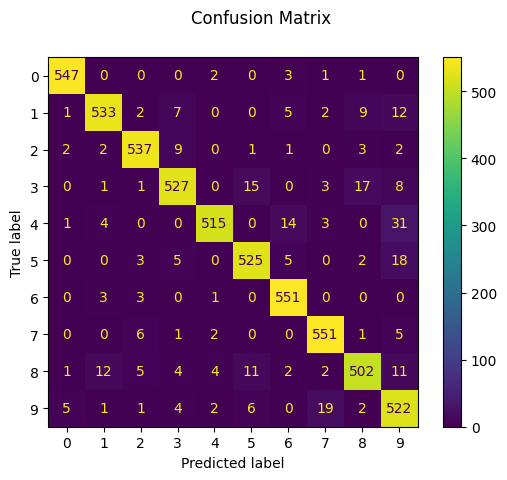

In [5]:
regr = LogisticRegression(fit_intercept=True, max_iter=10000) 
regr.fit(X_train, y_train);
#Se hace la prediccion con los datos de testeo
y_pred = regr.predict(X)
print(
    f"Classification report for classifier {regr}:\n"
    f"{metrics.classification_report(y, y_pred)}\n"
)
disp = metrics.ConfusionMatrixDisplay.from_predictions(y, y_pred)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

C:\Users\hugot\miniconda3\envs\ia2023\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Classification report for classifier DecisionTreeClassifier():
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       554
           1       0.80      0.75      0.77       571
           2       0.91      0.83      0.87       557
           3       0.67      0.80      0.73       572
           4       0.90      0.77      0.83       568
           5       0.67      0.74      0.71       558
           6       0.86      0.92      0.89       558
           7       0.91      0.80      0.85       566
           8       0.71      0.66      0.68       554
           9       0.68      0.78      0.73       562

    accuracy                           0.80      5620
   macro avg       0.81      0.80      0.80      5620
weighted avg       0.81      0.80      0.80      5620


Confusion matrix:
[[514   0   0   8   5   9   8   0   4   6]
 [  3 429  18  18  10  17   6   5  50  15]
 [  1  26 465  30   0   0   8   0  21   6]
 [  0   5   9 459   3  21   1 

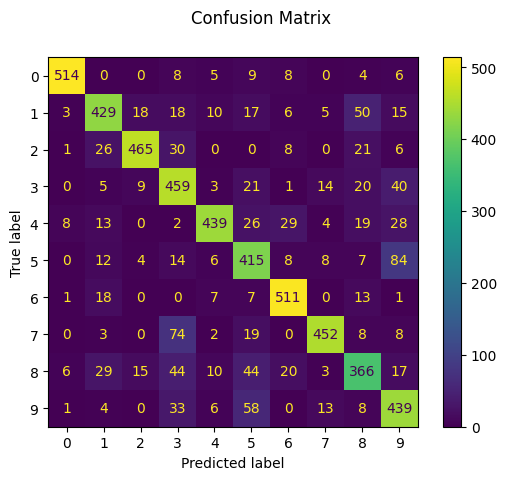

In [7]:
tree = DecisionTreeClassifier();
tree.fit(X_train,y_train);

#Se hace la prediccion con los datos de testeo
y_pred = tree.predict(X)

print(
    f"Classification report for classifier {tree}:\n"
    f"{metrics.classification_report(y, y_pred)}\n"
)
disp = metrics.ConfusionMatrixDisplay.from_predictions(y, y_pred)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [ ]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train);

#Se hace la prediccion con los datos de testeo
y_pred = forest.predict(X)

print(
    f"Classification report for classifier {regr}:\n"
    f"{metrics.classification_report(y, y_pred)}\n"
)
disp = metrics.ConfusionMatrixDisplay.from_predictions(y, y_pred)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

COGER 3 PARAMETROS PARA EL CROSS VALIDATION Y SABER EXPLICARLOS LIBRERIA sklearn.model_selection.GridSearchCV

## MEJORA PERCEPTRON

In [ ]:
parameters = {'tol':(1e-8,1e-9,1e-10), 'C':[1, 10]}
perceptron = Perceptron(random_state=42)
clf = GridSearchCV(perceptron, parameters)
clf.fit(X_test,y_test)
y_pred = clf.predict(X)
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y, y_pred)}\n"
)
disp = metrics.ConfusionMatrixDisplay.from_predictions(y, y_pred)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()
